In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\vimalson\Downloads\health_data.csv')

In [3]:
#ALCPROBS1 = alcohol problems
#DEVIANT1 = deviant behavior
#VIOL1 = voilent behavior
#dep = depression
#paractv = parental activity
#parpres = parental presence
#famconct = family connectedness
#esteem = self estem

In [4]:
df.head()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
BIO_SEX      6503 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1016.4 KB


In [6]:
df.columns = map(str.upper,df.columns)

In [7]:
df=df.dropna()


In [8]:
df.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,14.509589,0.0,0.0,0,0,0,0,0.0,8.0,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,13.676712,0.0,0.0,0,0,0,0,1.0,4.0,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,15.178082,1.0,1.0,0,1,0,0,1.0,4.0,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [10]:
data = df[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1','DEP1','ESTEEM1','SCHCONN1','PARACTV','PARPRES','FAMCONCT']]

In [11]:
##Standardization of considered features

In [12]:
cluster = data.copy()

In [13]:
cluster['ALCEVR1'] = preprocessing.scale(cluster['ALCEVR1'].astype('float64'))
cluster['MAREVER1'] = preprocessing.scale(cluster['MAREVER1'].astype('float64'))
cluster['ALCPROBS1'] = preprocessing.scale(cluster['ALCPROBS1'].astype('float64'))
cluster['DEVIANT1'] = preprocessing.scale(cluster['DEVIANT1'].astype('float64'))
cluster['VIOL1'] = preprocessing.scale(cluster['VIOL1'].astype('float64'))
cluster['DEP1'] = preprocessing.scale(cluster['DEP1'].astype('float64'))
cluster['ESTEEM1'] = preprocessing.scale(cluster['ESTEEM1'].astype('float64'))
cluster['SCHCONN1'] = preprocessing.scale(cluster['SCHCONN1'].astype('float64'))
cluster['PARACTV'] = preprocessing.scale(cluster['PARACTV'].astype('float64'))
cluster['PARPRES'] = preprocessing.scale(cluster['PARPRES'].astype('float64'))
cluster['FAMCONCT'] = preprocessing.scale(cluster['FAMCONCT'].astype('float64'))

In [14]:
##cluster analysis

In [15]:
cluster_train,cluster_test = train_test_split(cluster,test_size=0.3,random_state=200)

In [16]:
cluster_train.shape,cluster_test.shape

((3220, 11), (1381, 11))

In [17]:
from scipy.spatial.distance import cdist

In [18]:
clusters = range(1,11)
mean_dist = []

In [19]:
for i in clusters:
    model = KMeans(n_clusters=i)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train,model.cluster_centers_,'euclidean'),axis=1))/cluster_train.shape[0])

In [20]:
#plot a elbow curve

Text(0.5, 1.0, 'Elbow curve for our k values')

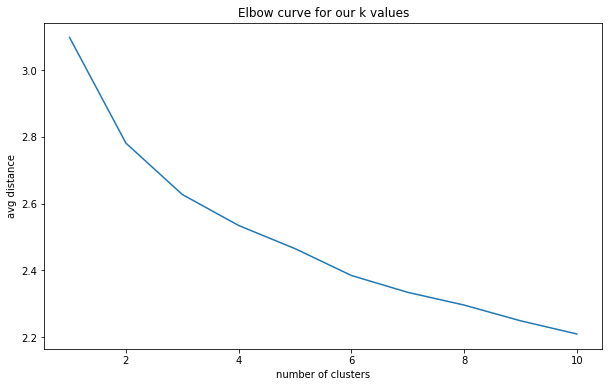

In [22]:
plt.figure(figsize=(10,6))
plt.plot(clusters,mean_dist)
plt.xlabel('number of clusters')
plt.ylabel('avg distance')
plt.title('Elbow curve for our k values')

In [ ]:
#canonical discrimination analysis

In [34]:
model1 = KMeans(n_clusters=3)
model1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(2)

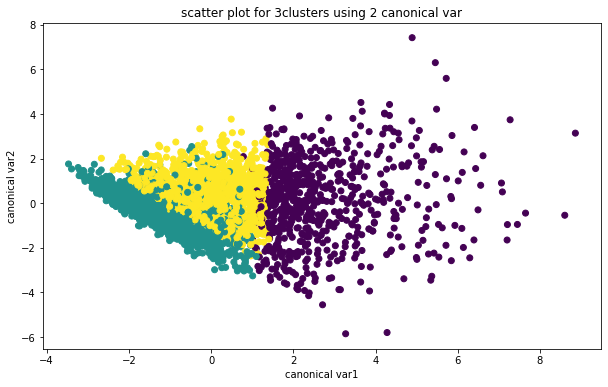

In [36]:
plt.figure(figsize =(10,6))
plot_columns = pca.fit_transform(cluster_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model1.labels_)
plt.xlabel('canonical var1')
plt.ylabel('canonical var2')
plt.title('scatter plot for 3clusters using 2 canonical var')
plt.show()

In [38]:
## 2-cluster solution

In [37]:
model2 = KMeans(n_clusters=2)
model2.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

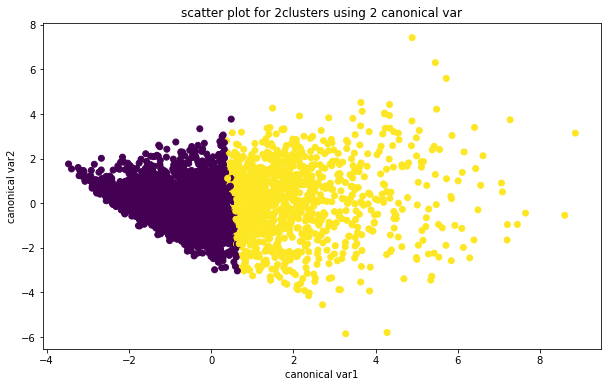

In [40]:
plt.figure(figsize =(10,6))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model2.labels_)
plt.xlabel('canonical var1')
plt.ylabel('canonical var2')
plt.title('scatter plot for 2clusters using 2 canonical var')
plt.show()